In [1]:
import tensorflow as tf
import pathlib

import numpy as np
import matplotlib.pyplot as plt

2022-11-15 10:33:20.712164: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-11-15 10:33:20.822423: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2022-11-15 10:33:20.845393: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-11-15 10:33:21.329472: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: li

In [2]:
from keras import layers

In [3]:
dataset_url = "/home/tinozg/Documents/AI/CNN/Data/flower"
data_dir = pathlib.Path(dataset_url)

batch_size = 32
img_height = 180
img_width = 180

In [4]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "training",
  seed = 125,
  image_size = (img_height, img_width),
  batch_size = batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split = 0.2,
  subset = "validation",
  seed = 125,
  image_size = (img_height, img_width),
  batch_size = batch_size)

Found 4317 files belonging to 5 classes.
Using 3454 files for training.


2022-11-15 10:33:22.327324: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 10:33:22.332140: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 10:33:22.332247: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:980] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-15 10:33:22.332564: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compi

Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [5]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


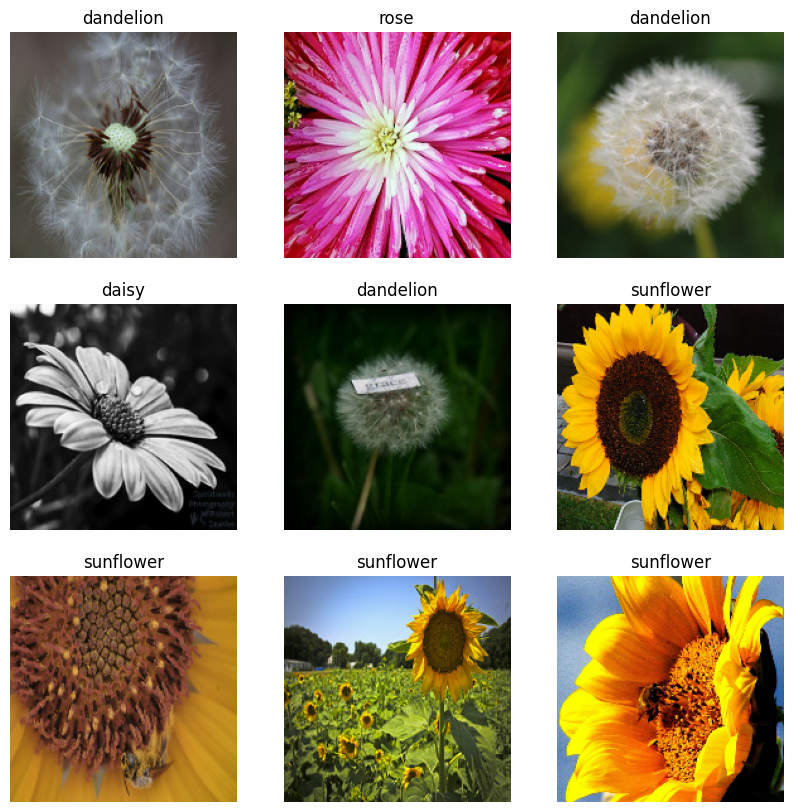

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [7]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [8]:
from keras import layers, models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Rescaling
from keras.models import Sequential, Model

In [9]:
num_classes = len(class_names)

model = Sequential()

model.add(Rescaling(1./255))

model.add(Conv2D(32, kernel_size = 3, activation = "relu", input_shape = (180, 180, 3), padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Conv2D(128, kernel_size = 3, activation = "relu", padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Conv2D(32, kernel_size = 3, activation = "relu", padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Conv2D(64, kernel_size = 3, activation = "relu", padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Conv2D(128, kernel_size = 3, activation = "relu", padding = "same"))
model.add(MaxPooling2D((2, 2), padding = "same"))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))

In [10]:
model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [11]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, Callback
from IPython.display import clear_output

class DisplayCallback(Callback):
  def on_epoch_end(self, epoch, logs=None):
    clear_output(wait=True)

callbacks = [DisplayCallback(), 
            EarlyStopping(patience=11, verbose=1),
            ReduceLROnPlateau(patience=5, verbose=1),
            ModelCheckpoint('Flower.h5', verbose=1, save_best_only=True)]

In [12]:
history = model.fit(
          train_ds,
          validation_data = val_ds,
          epochs = 100,
          callbacks = callbacks
        )


Epoch 18: val_loss did not improve from 0.79415
108/108 [==============================] - 8s 70ms/step - loss: 0.0279 - accuracy: 0.9954 - val_loss: 1.6307 - val_accuracy: 0.7184 - lr: 1.0000e-05
Epoch 18: early stopping


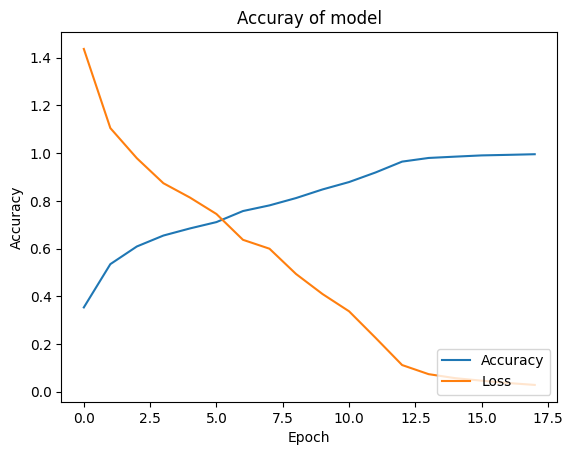

In [13]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["loss"])
plt.title("Accuray of model")

plt.ylabel("Accuracy")
plt.xlabel("Epoch")

plt.legend(["Accuracy", "Loss"], loc = "lower right")

1/1 [==============================] - 0s 263ms/step
Predict: tulip


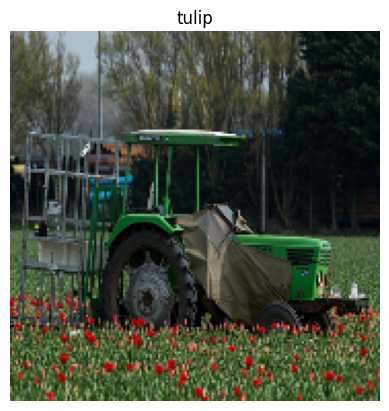

In [14]:
for images, labels in train_ds.take(1):
  
  plt.imshow(images[1].numpy().astype("uint8"))
  plt.title(class_names[labels[1]])
  plt.axis("off")
  
  img = np.expand_dims(images[1], axis = 0)
  
  print('Predict:',class_names[np.argmax(model.predict(img))])

1/1 [==============================] - 0s 15ms/step
Predict: rose


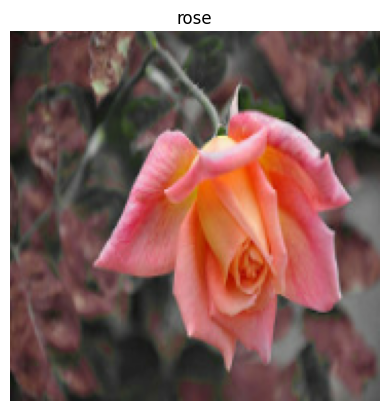

In [16]:
for images, labels in val_ds.take(1):
  
  plt.imshow(images[1].numpy().astype("uint8"))
  plt.title(class_names[labels[1]])
  plt.axis("off")
  
  img = np.expand_dims(images[1], axis = 0)
  
  print('Predict:',class_names[np.argmax(model.predict(img))])